### Importing necessary libraries

In [2]:
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.cosmology import Planck18
from scipy.optimize import curve_fit

### Loading the data file

In [ ]:
file = np.loadtxt(fname='Survey_Wankhede.csv', delimiter=',', skiprows=1)
#print(file) # Hashtagging since unnecessary to print, but can be used if needed. 
print(file.shape[:])

(105365, 3)


<span style='font-size:medium'>**Q1. Remove any non\-robustly detected galaxies from their catalogue.** </span>



In [6]:
#Storing the data in seperate variables, x = redshifts; y = k-band mag, y_err = error in k-band mag, 
#Let,
x = file[:, 0]
y = file[:, 1]
y_err = file[:, 2]


#SOLUTION:
#Defining the threshold to be 3_sigma...(given)
threshold = 3

#Calculating the apparent magnitude limit for the robust detection,
limiting_y = 22 - 2.5 * np.log10(threshold)

#filtering out non-robustly detected galaxies by the condition given .i.e. for all y < limiting_y
filter_1 = y <= limiting_y

#Applying the filter to non-robustly detected galaxies
Non_robust_x = x[filter_1]             #non robust redshift.
Non_robust_y = y[filter_1]             #non robust k-band magnitude.
Non_robust_y_err = y_err[filter_1]     #errors for non robust magnitudes.

#Printing the results. 
print('The non-robustly detected galaxies are:')
for i, (x, y, yerr) in enumerate(zip(Non_robust_x, Non_robust_y, Non_robust_y_err)):
    print(f"Non Robust Redshift = {x:.4f}, Non Robust k-band = {y:.4f}, Non Robust k-band Error = {yerr:.4f}")

The non-robustly detected galaxies are:
Non Robust Redshift = 0.1620, Non Robust k-band = 18.3420, Non Robust k-band Error = 0.0370
Non Robust Redshift = 0.1690, Non Robust k-band = 20.6630, Non Robust k-band Error = 0.2780
Non Robust Redshift = 0.1350, Non Robust k-band = 17.8640, Non Robust k-band Error = 0.0240
Non Robust Redshift = 0.1440, Non Robust k-band = 18.2210, Non Robust k-band Error = 0.0330
Non Robust Redshift = 0.0350, Non Robust k-band = 18.1090, Non Robust k-band Error = 0.0300
Non Robust Redshift = 0.1670, Non Robust k-band = 18.8010, Non Robust k-band Error = 0.0560
Non Robust Redshift = 0.1750, Non Robust k-band = 19.7480, Non Robust k-band Error = 0.1280
Non Robust Redshift = 0.0820, Non Robust k-band = 19.0120, Non Robust k-band Error = 0.0670
Non Robust Redshift = 0.0560, Non Robust k-band = 19.4300, Non Robust k-band Error = 0.0970
Non Robust Redshift = 0.1880, Non Robust k-band = 16.0290, Non Robust k-band Error = 0.0040
Non Robust Redshift = 0.1500, Non Robust

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Non Robust Redshift = 0.1180, Non Robust k-band = 20.6430, Non Robust k-band Error = 0.2740
Non Robust Redshift = 0.0600, Non Robust k-band = 16.3600, Non Robust k-band Error = 0.0060
Non Robust Redshift = 0.1600, Non Robust k-band = 13.8540, Non Robust k-band Error = 0.0010
Non Robust Redshift = 0.1880, Non Robust k-band = 19.5530, Non Robust k-band Error = 0.1080
Non Robust Redshift = 0.1890, Non Robust k-band = 20.5550, Non Robust k-band Error = 0.2550
Non Robust Redshift = 0.1680, Non Robust k-band = 19.6360, Non Robust k-band Error = 0.1170
Non Robust Redshift = 0.1590, Non Robust k-band = 17.3490, Non Robust k-band Error = 0.0150
Non Robust Redshift = 0.1720, Non Robust k-band = 19.9010, Non Robust k-band Error = 0.1470
Non Robust Redshift = 0.1470, Non Robust k-band = 19.1200, Non Robust k-band Error = 0.0740
Non Robust Redshift = 0.1770, Non Robust k-band = 20.0660, Non Robust k-band Error = 0.1690
Non Robust Redshift = 0.1330, Non Robust k-band = 19.7750, Non Robust k-band Err

<span style='font-size:medium'>**Q2. Produce a plot showing the number counts of the robustly\-detected galaxies in their catalogue.** </span>



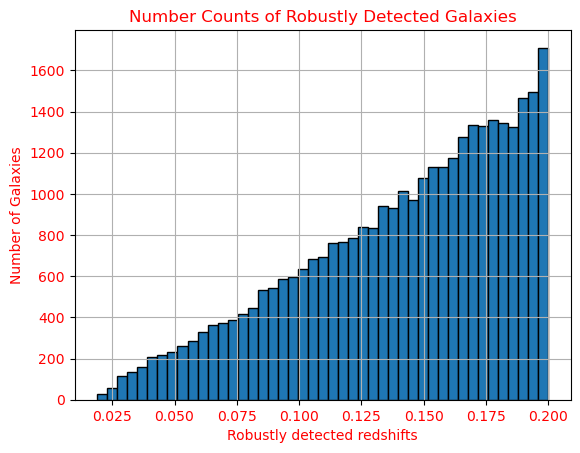

In [8]:
#Producing the plot for the above question as a histogram.

#SOLUTION:
#Since we have,
x = file[:, 0]  # Redshifts
y = file[:, 1]  # k-band mag
y_err = file[:, 2]  # Error in mag

#Threshold for robust detection (3 sigma)
threshold = 3

#Limiting apparent magnitude for robust detection
limiting_y = 22 - 2.5 * np.log10(threshold)

#Filtering for robust galaxies (y >= limiting_y)
filter_2 = y >= limiting_y

#Applying filter to get robust galaxies
robust_x = x[filter_2]   
robust_y = y[filter_2] #(though will not be needing for this question.)

#Counting the number of robust galaxies in each bin
counts, bins, patches = plt.hist(robust_x, bins='auto', edgecolor='black')  # Use 'auto' for automatic binning

#Plotting the histogram
plt.xlabel('Robustly detected redshifts', color='red')
plt.xticks(color='red')
plt.ylabel('Number of Galaxies', color='r')
plt.yticks(color='r')
plt.title('Number Counts of Robustly Detected Galaxies', color='r')
plt.grid('true')
plt.show()

<span style='font-size:medium'>**Q3. Select only z &lt; 0.1 galaxies.**</span>


In [10]:
#SOLUTION:
#Since, we already have, 
x = file[:, 0] #all the redshifts,

#let redshifts under 0.1 be called 'redshifts_values'

#Now, since, 
condition= np.where(x < 0.1)
redshift_values = x[condition]

#Printing the results,
print(redshift_values)

[0.035 0.082 0.056 ... 0.069 0.086 0.028]


<span style='font-size:medium'>**Q4. Calculate the volume of the z &lt; 0.1 Universe covered by their survey, assuming a Planck 2018 cosmology**</span>


In [12]:
#SOLUTION:

#Let,
z_min = 0.0  #Minimum redshift
z_max = 0.1 #Maximum redshift

#Using the comoving distance of Planck18 to calculate the volume of the z < 0.1
d_comoving_min = Planck18.comoving_distance(z_min).value  #Comoving distance at z_min
d_comoving_max = Planck18.comoving_distance(z_max).value  #Comoving distance at z_max

survey_area = 10.0  #Survey area in square degrees
total_sky_area = 4 * np.pi * (180 / np.pi) ** 2  #Total area of the sky
survey_volume = (survey_area / total_sky_area) * (d_comoving_max**3 - d_comoving_min**3)

print("Volume of the Universe covered by the survey:", survey_volume, 'Mpc^3')

Volume of the Universe covered by the survey: 19620.094846983182 Mpc^3


<span style='font-size:medium'>**Q5. Calculate the luminosity distance of each z &lt; 0.1 galaxy in their catalogue, again assuming a Planck 2018 cosmology**</span>


In [14]:
#SOLUTION:
#Since we have, 
file = np.loadtxt(fname='Survey_Wankhede.csv', delimiter=',', skiprows=1)
x = file[:, 0]  #redshifts

condition = np.where(x < 0.1)
redshift_values = x[condition]

#Printing the luminosity distances
print('The luminosity distances for redshifts < 0.1 are as follows: \n', Planck18.luminosity_distance(redshift_values))


The luminosity distances for redshifts < 0.1 are as follows: 
 [159.18828868 385.49054534 258.56365132 ... 321.49600843 405.39239809
 126.70014384] Mpc


<span style='font-size:medium'>**Q6. Calculate the absolute magnitude of each z &lt; 0.1 galaxy in their catalogue, including errors.** </span>



In [16]:
#SOLUTION:

#Filtering galaxies with z < 0.1 again,
z_filter = x < 0.1
apparent_magnitudes = y[z_filter]
magnitude_errors = y_err[z_filter]

#Calculating luminosity distance for galaxies with z < 0.1
luminosity_distances = Planck18.luminosity_distance(x[z_filter])

#Calculating absolute magnitudes for z < 0.1
absolute_magnitudes = apparent_magnitudes - 5 * np.log10(luminosity_distances.value / 10)

#Calculating absolute magnitude errors using error propagation formula
absolute_magnitude_errors = np.sqrt((2.5 / np.log(10) * magnitude_errors / apparent_magnitudes)**2 + (5 / (luminosity_distances * np.log(10))).value**2)

#Printing the absolute magnitudes and errors for each galaxy
for i, (abs_mag, abs_mag_err) in enumerate(zip(absolute_magnitudes, absolute_magnitude_errors)):
    print(f"Galaxy {i+1}: Absolute Magnitude = {abs_mag:.4f} +/- {abs_mag_err:.4f}")


Galaxy 1: Absolute Magnitude = 12.0994 +/- 0.0138
Galaxy 2: Absolute Magnitude = 11.0819 +/- 0.0068
Galaxy 3: Absolute Magnitude = 12.3672 +/- 0.0100
Galaxy 4: Absolute Magnitude = 10.6121 +/- 0.0066
Galaxy 5: Absolute Magnitude = 14.9365 +/- 0.0329
Galaxy 6: Absolute Magnitude = 12.8842 +/- 0.0119
Galaxy 7: Absolute Magnitude = 15.2113 +/- 0.0236
Galaxy 8: Absolute Magnitude = 12.8602 +/- 0.0121
Galaxy 9: Absolute Magnitude = 12.0368 +/- 0.0090
Galaxy 10: Absolute Magnitude = 7.2431 +/- 0.0056
Galaxy 11: Absolute Magnitude = 13.1404 +/- 0.0257
Galaxy 12: Absolute Magnitude = 11.3829 +/- 0.0111
Galaxy 13: Absolute Magnitude = 11.8000 +/- 0.0084
Galaxy 14: Absolute Magnitude = 14.1458 +/- 0.0262
Galaxy 15: Absolute Magnitude = 12.9055 +/- 0.0170
Galaxy 16: Absolute Magnitude = 14.1024 +/- 0.0168
Galaxy 17: Absolute Magnitude = 14.1487 +/- 0.0342
Galaxy 18: Absolute Magnitude = 15.0412 +/- 0.0369
Galaxy 19: Absolute Magnitude = 13.9600 +/- 0.0322
Galaxy 20: Absolute Magnitude = 14.1582 +

<span style='font-size:medium'>**7. Calculate the limiting absolute magnitude of their survey**</span>



In [18]:
# Calculating the limiting absolute magnitude of the survey. 
#Since, the limiting apparent magnitude of the survey is 22 mag for 3_sigma...(given)


#SOLUTION:

#Let, 
limiting_apparent_magnitude = 22 #Since, given.

limiting_luminosity_distance = Planck18.luminosity_distance(x[limiting_apparent_magnitude])
limiting_absolute_magnitude = limiting_apparent_magnitude - 5 * np.log10(limiting_luminosity_distance.value/10)

#Printing the results, 
print('The limiting luminosity distance of the survey is: ', limiting_luminosity_distance)
print('The limiting absolute magnitude of the survey is: ', limiting_absolute_magnitude, 'mags')

The limiting luminosity distance of the survey is:  845.4042213288466 Mpc
The limiting absolute magnitude of the survey is:  12.3646779397668 mags


<span style='font-size:medium'>**Q8. Create a plot showing the luminosity function of the z &lt; 0.1 galaxies in their sample.** </span>



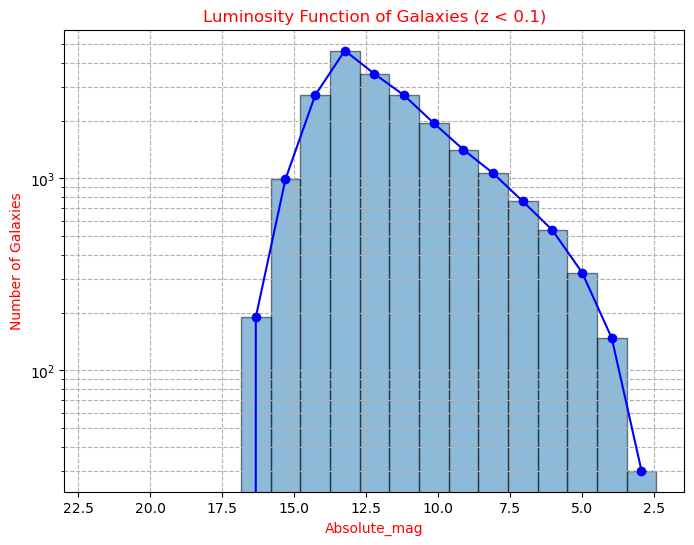

In [20]:
#To show the luminosity function for all z<0.1 galaxies from the sample. 
#SOLUTION:

#creating a filter to seperate galaxies with redshift less than 0.1.
z_threshold = 0.1
z_filtered = x[x < z_threshold]
y_filtered = y[x < z_threshold]


luminosity_distances = Planck18.luminosity_distance(z_filtered)

absolute_magnitudes = y_filtered - 5 * np.log10(luminosity_distances.value / 10)

#Bin the Absolute magnitudes
Absolute_mag_bins = np.linspace(np.min(absolute_magnitudes), np.max(y_filtered), 20)

#In order to plot a line, we need bin centres.
Absolute_mag_bin_centers = 0.5 * (Absolute_mag_bins[:-1] + Absolute_mag_bins[1:])

#Number count of galaxies in each bin
Absolute_mag_hist, _ = np.histogram(absolute_magnitudes, bins=Absolute_mag_bins)

#Plotting the luminosity function
plt.figure(figsize=(8, 6))
plt.plot(Absolute_mag_bin_centers, Absolute_mag_hist, marker='o', color='b', linestyle='-')
plt.bar(Absolute_mag_bins[:-1], Absolute_mag_hist, width=np.diff(Absolute_mag_bins), align='edge', edgecolor='black', alpha=0.5)
plt.gca().invert_xaxis()    #Inverting the xaxis, So that the brightness is in increasing order
plt.xlabel('Absolute_mag', color='r')
plt.ylabel('Number of Galaxies', color='r')
plt.title('Luminosity Function of Galaxies (z < 0.1)', color='r')
plt.yscale('log')  #Using Log scale for better visualization
plt.grid(True, which="both", ls="--")
plt.show()

<span style='font-size:medium'>**Q9. Fit a Schechter function. n\(M\)dM = 0.4\\ln\(10\)\\phi^{\*} \[10^{0.4\(M\-M^{\*}\)}\] \+ 1 \\exp\(\-10.4\(M/M^{\*}\)\) dM**</span>


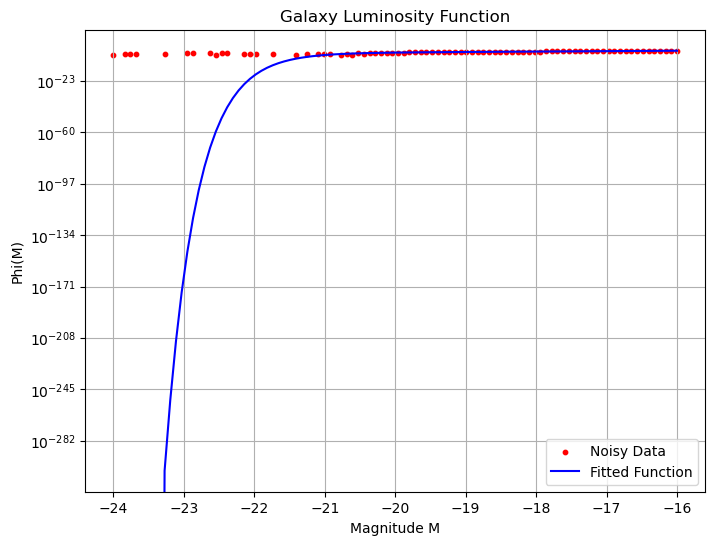

Fitted parameters:
phi_star: 0.0032
M_star: -20.4329
alpha: -1.2994


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function to model and create data
def schechter_function(M, phi_star, M_star, alpha):
    term1 = (10 ** ((M_star - M) * (1 + alpha)))
    term2 = np.exp(-10 ** (M_star - M))
    return phi_star * term1 * term2

# Generate mock data for galaxy luminosity function
M_values = np.linspace(-24, -16, 100)
true_params = (0.003, -20.5, -1.3)
phi_values = schechter_function(M_values, *true_params)

# Add noise to simulate observational data
noise = np.random.normal(0, 0.0005, size=phi_values.shape)
phi_noisy = phi_values + noise

# Fit the Schechter function to the noisy data
popt, pcov = curve_fit(schechter_function, M_values, phi_noisy, p0=true_params)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(M_values, phi_noisy, label="Noisy Data", color='red', s=10)
plt.plot(M_values, schechter_function(M_values, *popt), label="Fitted Function", color='blue')
plt.xlabel("Magnitude M")
plt.ylabel("Phi(M)")
plt.title("Galaxy Luminosity Function")
plt.legend()
plt.yscale("log")
plt.grid()
plt.show()

# Print the best-fit parameters
print("Fitted parameters:")
print(f"phi_star: {popt[0]:.4f}")
print(f"M_star: {popt[1]:.4f}")
print(f"alpha: {popt[2]:.4f}")
